# Worksheet 3. Machine Learning
## Girls in Data Science Camp

In this worksheet, we will be working with the [Nutrition Facts for McDonald's Menu](https://www.kaggle.com/datasets/mcdonalds/nutrition-facts?resource=download) data, which contains information about items sold at McDonald across 9 food categories. 
<br>
<img src="img/logo.png" alt="Logo" style="width: 300px; display: block; margin-left: auto; margin-right: auto;"/>
From the original dataset, we will be excluding the `Item` and `Serving Size` columns, as they are not relevant to the machine learning model we are about to build. Integrating these columns with the predictors used in this worksheet is beyond the scope of this camp.

In [8]:
# Load libraries
library(tidyverse)
library(dplyr)
library(tidymodels)
set.seed(100)

In [9]:
mcdonalds <- read_csv("data/menu.csv")
head(mcdonalds, 5)
dim(mcdonalds)

Rows: 260 Columns: 24
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): Category, Item, Serving Size
dbl (21): Calories, Calories from Fat, Total Fat, Total Fat (% Daily Value),...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,...,31,10,4,17,3,17,10,0,25,15
Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,...,30,10,4,17,3,18,6,0,25,8
Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,...,29,10,4,17,2,14,8,0,25,10
Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,...,30,10,4,17,2,21,15,0,30,15
Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23,35,8,42,0,...,30,10,4,17,2,21,6,0,25,10


[1] 260  24

Each row in this dataset represents a specific item sold at McDonald's. For instance, the first row contains the nutritional information for "Egg McMuffin", categorized under "Breakfast" according to its `Category`.

### Exercise 0: Knowledge Check
For each of the cases below, determine whether it is more suitable to use **classification** or **regression**. 

- Predicting whether an email is spam or not: _Classification_
- Predicting the price of a house based on its features (e.g., size, location, number of rooms): _Regression_
- Identifying different species of animals based on their physical characteristics: _Classification_
- Determining whether a movie character belongs to a Pixar film or a Disney film: _Classfication_

### Exercise 1: Performing Explanatory Data Analysis

#### 1.1 Inspecting Columns In Data
Before proceeding further, let's perform a brief inspection of the columns in our dataset. We will investigate the class of each column and list all the columns present in the data.

In [10]:
### YOUR CODE HERE
glimpse(mcdonalds)

Rows: 260
Columns: 24
$ Category                        <chr> "Breakfast", "Breakfast", "Breakfast",~
$ Item                            <chr> "Egg McMuffin", "Egg White Delight", "~
$ `Serving Size`                  <chr> "4.8 oz (136 g)", "4.8 oz (135 g)", "3~
$ Calories                        <dbl> 300, 250, 370, 450, 400, 430, 460, 520~
$ `Calories from Fat`             <dbl> 120, 70, 200, 250, 210, 210, 230, 270,~
$ `Total Fat`                     <dbl> 13, 8, 23, 28, 23, 23, 26, 30, 20, 25,~
$ `Total Fat (% Daily Value)`     <dbl> 20, 12, 35, 43, 35, 36, 40, 47, 32, 38~
$ `Saturated Fat`                 <dbl> 5, 3, 8, 10, 8, 9, 13, 14, 11, 12, 12,~
$ `Saturated Fat (% Daily Value)` <dbl> 25, 15, 42, 52, 42, 46, 65, 68, 56, 59~
$ `Trans Fat`                     <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0~
$ Cholesterol                     <dbl> 260, 25, 45, 285, 50, 300, 250, 250, 3~
$ `Cholesterol (% Daily Value)`   <dbl> 87, 8, 15, 95, 16, 100, 83, 83, 11, 11~
$ Sodium          

#### 1.2 Removing Unwanted Columns
As discussed, let's exclude the `Item` and `Serving Size` columns from the dataset for the upcoming activities. Additionally, we will convert the `Category` column to the _factor_ class. 

Explain the distinctions between the `factor` and `character` classes in R, and illustrate the advantages of converting the `Category` column into a `factor`.

In [11]:
### YOUR CODE HERE
mcdonalds <- mcdonalds |>
    select(-Item, -`Serving Size`) |>
    mutate(Category = as_factor(Category))
head(mcdonalds, 5)

Category,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breakfast,300,120,13,20,5,25,0,260,87,...,31,10,4,17,3,17,10,0,25,15
Breakfast,250,70,8,12,3,15,0,25,8,...,30,10,4,17,3,18,6,0,25,8
Breakfast,370,200,23,35,8,42,0,45,15,...,29,10,4,17,2,14,8,0,25,10
Breakfast,450,250,28,43,10,52,0,285,95,...,30,10,4,17,2,21,15,0,30,15
Breakfast,400,210,23,35,8,42,0,50,16,...,30,10,4,17,2,21,6,0,25,10


> In R, the `character` class is used for strings or text data, while the `factor` class is used for categorical data with some levels (whether it is ordinal or nominal). Converting the `Category` column to a `factor` will lead to more organized data analysis by providing explicit categories that are easier to manage and analyze, while optimizing both memory usage and statistical operations in R.

#### 1.3 Look into Distinct Categories
Given that each row in this dataset represents distinct items sold at McDonald's, let's determine the count of items belonging to each food category.

**<span style='color:orange'>Hint:</span>** Start by grouping all items by their `Category` and then count how many items fall into each `Category`. Your final data frame should have two columns: `Category` and `Count`.

In [12]:
### YOUR CODE HERE
mcdonalds_category <- mcdonalds |>
    group_by(Category) |>
    summarize(Count = n())
mcdonalds_category

Category,Count
<fct>,<int>
Breakfast,42
Beef & Pork,15
Chicken & Fish,27
Salads,6
Snacks & Sides,13
Desserts,7
Beverages,27
Coffee & Tea,95
Smoothies & Shakes,28


#### 1.4 Converting to Percentage
Let's add a new column named `Percentage` to indicate the proportion of items in each `Category`. Make sure that the final dataframe is sorted in descending order based on these percentages (e.g., From the highest percentage to the lowest percentage).

In [13]:
### YOUR CODE HERE
mcdonalds_category <- mcdonalds_category |>
    mutate(Percentage = round(Count / sum(Count) * 100, 2))
mcdonalds_category

Category,Count,Percentage
<fct>,<int>,<dbl>
Breakfast,42,16.15
Beef & Pork,15,5.77
Chicken & Fish,27,10.38
Salads,6,2.31
Snacks & Sides,13,5.00
Desserts,7,2.69
Beverages,27,10.38
Coffee & Tea,95,36.54
Smoothies & Shakes,28,10.77


#### 1.5 Creating a Bar Chart 
Let's create a bar chart that shows the distribution of each food category sold at McDonald's.

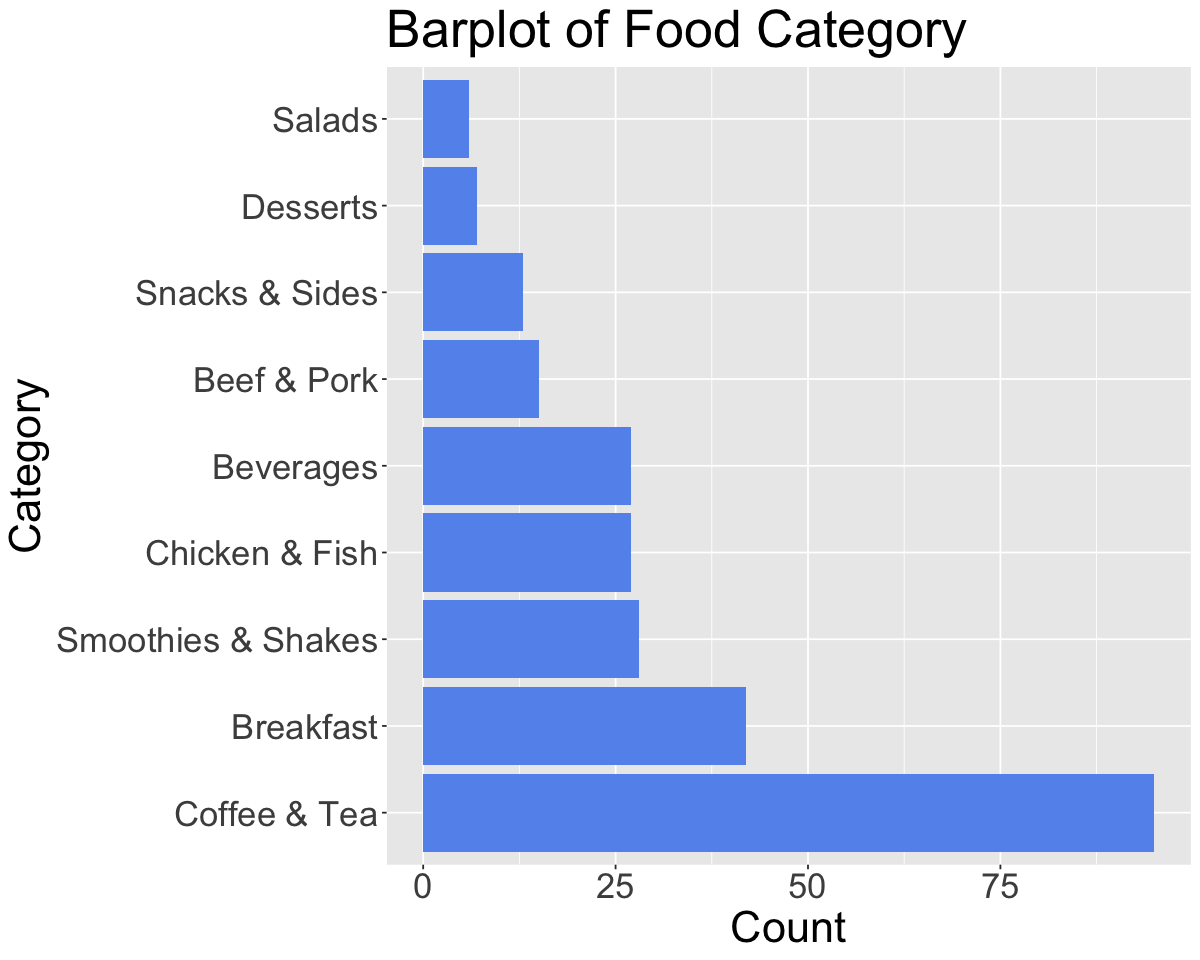

In [14]:
options(repr.plot.width = 10, repr.plot.height = 8)
### YOUR CODE HERE

ggplot(mcdonalds_category, aes(x = Count, y = reorder(Category, -Count))) +
    geom_bar(stat = 'identity', fill = "cornflowerblue") + 
    theme(text = element_text(size = 26)) +
    labs(
        x = "Count",                     
        y = "Category",                            
        title = "Barplot of Food Category"
    )

## Exercise 2. Building Machine Learning Model
In this exercise, we will build a classification model for Chef Ronald, who works at McDonald's headquarters. Ronald is preparing to launch his new "Mystery Item", but needs help classifying it into a specific food category. We will develop a machine learning model to classify this new item based on its nutritional information.

<br>
<img src="img/chef.png" alt="Chef" style="width: 300px; display: block; margin-left: auto; margin-right: auto;"/>

#### 2.1 Train, Test and Split
Let's use the "Train, Test, and Split" method to divide our `mcdonalds` dataset into training and testing data called `mcdonalds_train` and `mcdonalds_test`, respectively. Set the split ratio (initial_split) to $80$%. How many rows and columns of data do we have in each set?

Why do we need to split our data into train and test sets? Explain in one or two sentences. 

In [15]:
### YOUR CODE HERE
mcdonalds_split <- initial_split(mcdonalds, prop=0.8)
mcdonalds_train <- training(mcdonalds_split)
mcdonalds_test <- testing(mcdonalds_split)

cat(paste0("Dimensions of the training set are: ", paste(dim(mcdonalds_train), collapse = " x ")), "\n")
cat(paste0("Dimensions of the testing set are: ", paste(dim(mcdonalds_test), collapse = " x ")))

Dimensions of the training set are: 208 x 22 
Dimensions of the testing set are: 52 x 22

> Training data is specifically reserved for building and refining the model. Using test data for training compromises the model's ability to generalize to new, unseen data, potentially leading to overfitting and reduced performance in real-world applications. Therefore, it's crucial to maintain the separation of training and test datasets to accurately assess and improve the model's generalizability.

#### 2.2 Building Model and Recipe
Let's create a classification model using the k-Nearest Neighbor (k-NN) approach with $k=3$, following these guidelines:
- **Recipe**: Utilize all predictors in the dataset, excluding the `Category` column, which serves as our target variable.
- **Modeling**:  Initialize the modeling strategy with `weight_func="rectangular"`, use "kknn" as the engine, and set "classification" as the mode.

In [16]:
### YOUR CODE HERE
mcdonalds_recipe <- recipe(Category ~ ., data=mcdonalds_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

In [17]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

#### Fit the Data into the Workflow
Let's combine the recipe and model we previously defined to fit our `mcdonalds_train` data into a workflow. Follow these steps:
1. Initialize the workflow.
2. Specify the recipe.
3. Incloude the model.
4. Fit the training data.

In [18]:
### YOUR CODE HERE
knn_fit <- workflow() |>
    add_recipe(mcdonalds_recipe) |>
    add_model(knn_spec) |>
    fit(data=mcdonalds_train)

#### 2.3 Calculate Model Accuracy
Now, we will determine how accurate our model is. First, we will add a new column in our `mcdonalds_test` dataset that contains predictions made by our model. Then, we will calculate the model accuracy by evaluating how well these predictions match the actual Category values in the dataset. This accuracy assessment helps us understand how effectively our model can classify new items based on the training data it learned from.

This section of the worksheet needs you to fill in the blanks with the right answers or code. Uncomment the code and replace all `...` with what you think is the right answer. 

In [19]:
### REPLACE ALL ...
validation <- predict(knn_fit, mcdonalds_test) |>
    bind_cols(mcdonalds_test) |>
    rename(Category_pred = .pred_class)
head(validation, 5)

Category_pred,Category,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breakfast,Breakfast,370,200,23,35,8,42,0,45,...,29,10,4,17,2,14,8,0,25,10
Breakfast,Breakfast,430,210,23,36,9,46,1,300,...,31,10,4,18,3,26,15,2,30,20
Breakfast,Breakfast,410,180,20,32,11,56,0,35,...,36,12,2,7,3,20,2,8,15,10
Breakfast,Breakfast,410,180,20,31,8,41,0,30,...,41,14,2,6,3,17,0,2,6,15
Chicken & Fish,Breakfast,400,140,15,24,7,34,0,35,...,47,16,2,9,16,20,2,10,15,10


In [20]:
### REPLACE ALL ...
acc <- validation |>
  metrics(truth = Category, estimate = Category_pred) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

[1] 0.8076923

#### 2.4 Find the Best $k$-Value
Previously, our model was constructed using $k=3$ Now, let's explore how different values of $k$ affect our model's performance.

1. Start by running the cell below to establish our initial model.
2. In the subsequent cell, vary the first argument to test other $k$ values. For example:

```R
run_model(2, mcdonalds_train, mcdonalds_test)
run_model(3, mcdonalds_train, mcdonalds_test)
```
3. Identify and report the $k$ value that returns the highest accuracy. This will help us determine the optimal $k$ value for our classification model.

In [21]:
### RUN THIS CELL

run_model <- function(k_value, train_data, test_data) {
      mcdonalds_recipe <- recipe(Category ~ ., data=train_data) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())

      knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_value) |>
            set_engine("kknn") |>
            set_mode("classification")

      knn_fit <- workflow() |>
            add_recipe(mcdonalds_recipe) |>
            add_model(knn_spec) |>
            fit(data=mcdonalds_train)

      validation <- predict(knn_fit, mcdonalds_test) |>
            bind_cols(mcdonalds_test) |>
            rename(Category_pred = .pred_class)

      acc <- validation |>
            metrics(truth = Category, estimate = Category_pred) |>
            filter(.metric == "accuracy") |>
            select(.estimate) |>
            pull()
      
      acc

}

In [37]:
### TRY CHANGING THE FIRST ARGUMENT TO DIFFERENT NUMBERS

run_model(3, mcdonalds_train, mcdonalds_test)

[1] 0.8076923

> $k=2$ yields the highest accuracy.

#### 2.5 Predicting the Category of the Mystery Item
Now, it's finally time to make predictions on the Mystery Item! Using the model we defined in section 2.3, we will utilize the nutritional information of the Mystery Item to determine its `Category`. Uncomment and run the code chunks below. 

In [23]:
### Extracting column names from `mcdonalds_train`
predictors_names <- colnames(mcdonalds_train)
col_names <- predictors_names[predictors_names != "Category"]
col_names <- as.list(col_names)

In [24]:
### Randomly generating 21 numeric values to be used as the nutritional information of the new recipe
set.seed(100)
mystery_item <-  data.frame(t(runif(21, min = 0, max = 20)))
colnames(mystery_item ) <- col_names
mystery_item 

Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.155322,5.15345,11.04645,1.127663,9.370986,9.675415,16.24805,7.406411,10.93117,3.405241,...,17.64331,5.607077,7.969758,15.25102,13.38043,4.092243,7.150497,7.189502,13.80581,10.71622


What is the category of our new mysterious recipe?
> The `Category` of our new mysterious recipe is "Beef & Pork". 

In [25]:
predict(knn_fit, new_data = mystery_item)

.pred_class
<fct>
Beef & Pork
